In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [5]:
df = pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [7]:
import plotly.express as px

In [9]:
df['Month'] = pd.to_datetime(df['Date'])

In [12]:
df.dropna()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,2017-11-25
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,2017-11-26
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,2017-11-27
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,2017-11-28
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,2017-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good,2020-06-26
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020-06-27
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020-06-28
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020-06-29


In [24]:
def plot_aqi(df:pd.DataFrame,
            y:str)-> None:
    fig = px.line(df, x =y , y='Month', labels = {'Date':'Month'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text="AQI Check",
    width=800, title_x=0.5, height = 500)
    return fig.show()

plot_aqi(df=df,y='City')

In [36]:
def plot_aqi(df: pd.DataFrame, city_name: str) -> None:
    # Filter data for the given city
    city_data = df[df['City'] == city_name]
    
    # Ensure 'Date' and 'AQI' columns are being used correctly
    fig = px.line(city_data, x='Month', y='AQI', 
                  labels={'Month': 'Month', 'AQI': 'AQI Levels'}, 
                  title=f"AQI Levels in {city_name}")
    
    # Update the layout for better visualization
    fig.update_layout(template="simple_white", 
                      font=dict(size=18), 
                      title_x=0.5, 
                      width=800, 
                      height=500)
    
    # Show the plot
    return fig.show()

# Call the function
plot_aqi(df=df, city_name='Chandigarh')


In [37]:
from scipy.stats import boxcox

In [43]:
# Drop rows where AQI is NaN
city_data_cleaned = city_data.dropna(subset=['AQI'])

# Check the cleaned DataFrame
print(city_data_cleaned.head())

        AQI        Date  Year
7916  333.0  2015-03-24  2015
7918  318.0  2015-03-26  2015
7919  408.0  2015-03-27  2015
7920  448.0  2015-03-28  2015
7923  312.0  2015-03-31  2015


In [44]:
# Remove rows with NaN or infinite values in AQI
df_cleaned = df[df['City'] == city_name]
df_cleaned = df_cleaned[~df_cleaned['AQI'].isin([float('inf'), float('-inf')])]  # Remove infinite values

# Drop rows where AQI or Date is NaN
df_cleaned = df_cleaned.dropna(subset=['AQI', 'Date'])

# Extract Year and create the DataFrame
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year
city_yearwise_data = df_cleaned[['AQI', 'Year']]

# Display the cleaned DataFrame
print(city_yearwise_data.head())


        AQI  Year
7916  333.0  2015
7918  318.0  2015
7919  408.0  2015
7920  448.0  2015
7923  312.0  2015


In [46]:
# Assuming 'df_cleaned' is the DataFrame that contains cleaned AQI and Year columns

# Filter out rows with AQI <= 0 since Box-Cox requires positive values
df_cleaned = df_cleaned[df_cleaned['AQI'] > 0]

# Apply the Box-Cox transformation to the AQI column
df_cleaned['AQI_Boxcox'], lam = boxcox(df_cleaned['AQI'])

# Display the DataFrame with the transformed values
print(df_cleaned[['AQI', 'AQI_Boxcox', 'Year']].head())

# Optionally, you can print the lambda value used for the transformation
print(f"Box-Cox Lambda: {lam}")


        AQI  AQI_Boxcox  Year
7916  333.0    1.723635  2015
7918  318.0    1.721802  2015
7919  408.0    1.731176  2015
7920  448.0    1.734371  2015
7923  312.0    1.721030  2015
Box-Cox Lambda: -0.5573882180693405


In [50]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [51]:
#Augmented Dickey-Fuller Test
result = adfuller(df_cleaned['AQI_Boxcox'])
print("ADF Test Results:")
print(f"Test Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Critical Values: {result[4]}")

# Interpretation of p-value
if result[1] < 0.05:
    print("Reject Null Hypothesis: The series is stationary.")
else:
    print("Fail to Reject Null Hypothesis: The series is non-stationary.")

ADF Test Results:
Test Statistic: -4.4392251001668885
P-value: 0.00025281614629832035
Critical Values: {'1%': -3.433876312517571, '5%': -2.863097669161313, '10%': -2.567599247525482}
Reject Null Hypothesis: The series is stationary.


We use the adfuller() function to test the null hypothesis that the series is non-stationary. If the p-value is less than 0.05, we reject the null hypothesis, which means the series is stationary. Otherwise, the series is non-stationary, and we may need to apply differencing (e.g., d in ARIMA).

ACF plot shows how well the time series is correlated with its own past values. The significant spikes at different lags indicate the presence of autocorrelation at those lags.

In [54]:
from statsmodels.tsa.arima.model import ARIMA

PACF plot helps to identify the direct relationship between the series and its past lags, while removing the indirect effects of other intermediate lags.

ADF Test Result for Box-Cox Transformed Data: (-1.6931126075767704, 0.43466451679434426, 11, 287, {'1%': -3.453342167806272, '5%': -2.871663828287282, '10%': -2.572164381381345}, -586.2548364220651)


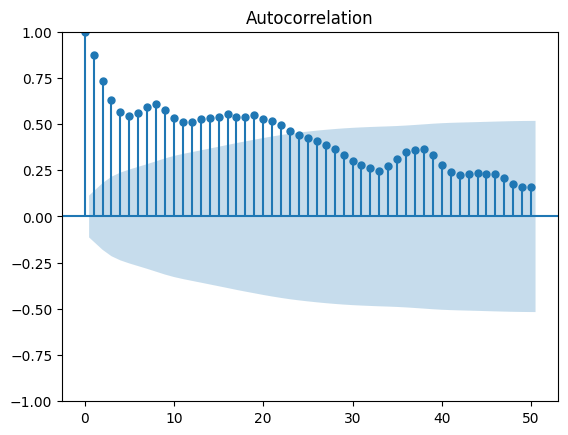

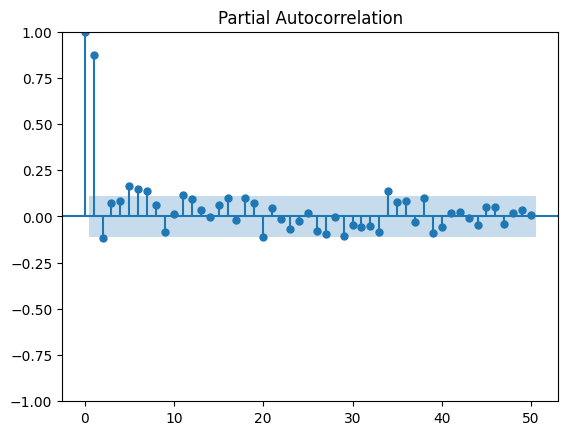

In [87]:
# Transform the AQI values for the city
df_cleaned = df[df['City'] == 'Chandigarh']['AQI'].dropna()
df_cleaned_boxcox, lam = boxcox(df_cleaned)

# ADF test for stationarity (on Box-Cox transformed data)
adf_result = adfuller(df_cleaned_boxcox)
print("ADF Test Result for Box-Cox Transformed Data:", adf_result)

# Plot ACF and PACF to determine p and q
plot_acf(df_cleaned_boxcox, lags=50)
plt.show()

plot_pacf(df_cleaned_boxcox, lags=50)
plt.show()

In [107]:
# Fit ARIMA Model: Try different combinations of p, d, q
# d = 0 because data is already stationary
p_values = range(0, 3)  # AR component (auto-regressive)
q_values = range(0, 3)  # MA component (moving average)
best_aic = np.inf
results = None

# Try different combinations of p, d, q
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(df_cleaned_boxcox, order=(p, 0, q))
            model_fit = model.fit()
            
            # Evaluate model based on AIC and BIC
            print(f"ARIMA({p}, 0, {q}) - AIC: {model_fit.aic}, BIC: {model_fit.bic}")
            
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                results = model_fit
        except Exception as e:
            print(f"Error fitting ARIMA({p}, 0, {q}): {e}")

# Print the best model
print(f"Best ARIMA Model: {results.summary()}")

ARIMA(0, 0, 0) - AIC: -185.66222105895727, BIC: -178.2613339121759
ARIMA(0, 0, 1) - AIC: -424.42074200324856, BIC: -413.3194112830765
ARIMA(0, 0, 2) - AIC: -515.9850168640783, BIC: -501.1832425705155
ARIMA(1, 0, 0) - AIC: -610.4583843018994, BIC: -599.3570535817273
ARIMA(1, 0, 1) - AIC: -613.0800403956104, BIC: -598.2782661020476
ARIMA(1, 0, 2) - AIC: -611.6203865522536, BIC: -593.1181686853002
ARIMA(2, 0, 0) - AIC: -612.549325651798, BIC: -597.7475513582352
ARIMA(2, 0, 1) - AIC: -611.3201170461055, BIC: -592.817899179152
ARIMA(2, 0, 2) - AIC: -622.0780241415611, BIC: -599.8753627012169
Best ARIMA Model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  299
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 317.039
Date:                Thu, 23 Jan 2025   AIC                           -622.078
Time:                        08:25:16   BIC                           -5

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [108]:
# Forecast future values (e.g., next 12 months)
forecast_steps = 12  # Forecast the next 12 months
forecast_values = results.forecast(steps=forecast_steps)
print(f"Forecasted AQI for next {forecast_steps} months: {forecast_values}")

# Inverse Box-Cox to get the original scale (if required)
forecast_original_scale = np.exp(forecast_values * lam)
print("Forecasted AQI (Original Scale):", forecast_original_scale)

Forecasted AQI for next 12 months: [2.65963186 2.66620901 2.67059384 2.67380207 2.67635949 2.67853923
 2.68048408 2.68226951 2.68393622 2.6855069  2.68699487 2.68840855]
Forecasted AQI (Original Scale): [0.53189795 0.53106821 0.53051576 0.53011192 0.52979021 0.52951617
 0.52927178 0.52904753 0.52883827 0.52864114 0.52845446 0.52827716]


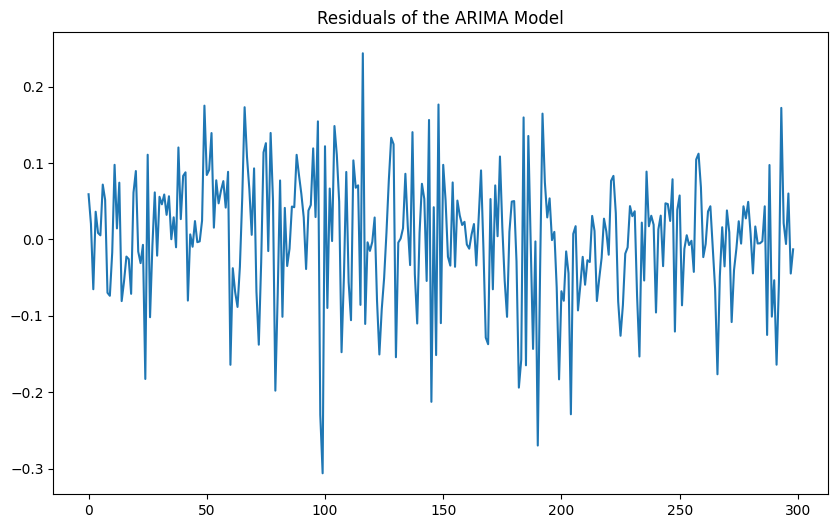

In [109]:
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()


In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
P, D, Q, S = 1, 1, 1, 12  # Example: Seasonal ARIMA(1,1,1)(1,1,1,12)
# Seasonal ARIMA example
model = SARIMAX(df_chandigarh['AQI'], 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, S))  # Seasonal parameters
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                      SARIMAX Results                                       
Dep. Variable:                                  AQI   No. Observations:                  299
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -1396.826
Date:                              Thu, 23 Jan 2025   AIC                           2811.653
Time:                                      08:27:46   BIC                           2844.557
Sample:                                           0   HQIC                          2824.842
                                              - 299                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7596      0.055     32.025      0.000       1.652       1.867
ar.L2         -1.73

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [113]:
forecast_steps = 12  # For example, forecast the next 12 months
forecast_values = results.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='ME')[1:]
print("Forecasted AQI for next 12 months:", forecast_values)


Forecasted AQI for next 12 months: 299    57.605424
300    47.272651
301    51.606717
302    43.912529
303    38.424846
304    44.904020
305    51.942719
306    61.853806
307    58.574224
308    58.187499
309    55.371543
310    53.039912
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [114]:
forecast_dates = pd.date_range(df.index[-1], periods=13, freq='ME')[1:]

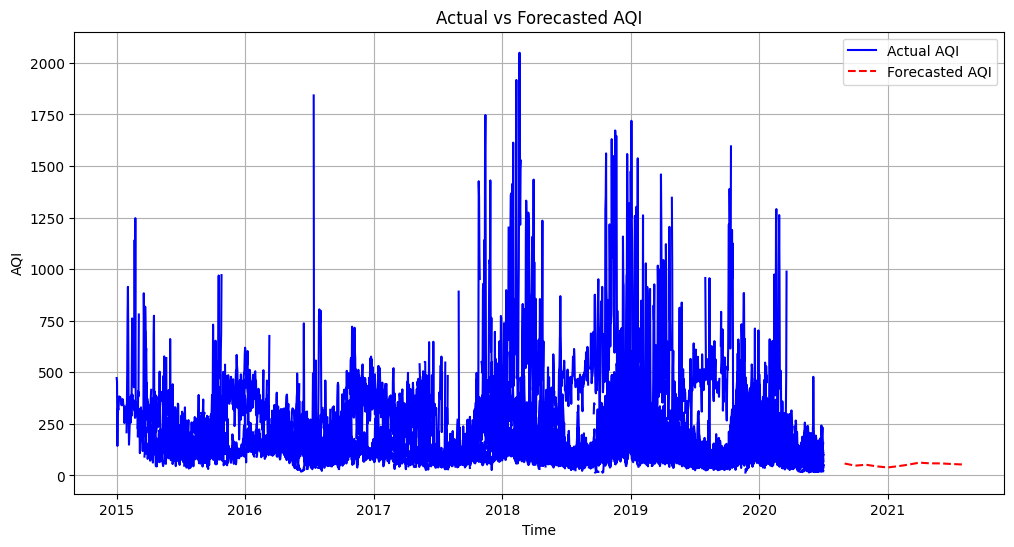

In [115]:
df['Month'] = pd.to_datetime(df['Date'])
df.set_index('Month', inplace=True)

# Plot Actual Values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='Actual AQI', color='blue')

# Create a date range for forecasted values (align it with your actual data)
forecast_dates = pd.date_range(start=df.index[-1], periods=len(forecast_values)+1, freq='ME')[1:]

# Plot Forecasted Values
plt.plot(forecast_dates, forecast_values, label='Forecasted AQI', color='red', linestyle='--')

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('AQI')
plt.title('Actual vs Forecasted AQI')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()